# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [2]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
enc_pro = pd.merge(encounter_df, provider_df, on='provider_id', how='left', suffixes=('', '_provider'))
merged_df = pd.merge(enc_pro, facility_df, on='facility_id', how='left', suffixes=('', '_facility'))

# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed


# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns)
print("\nFirst few rows:", merged_df.head())

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 23)

Columns: Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'facility_id_provider', 'specialty',
       'years_experience', 'license_number', 'facility_name', 'facility_type',
       'region_facility', 'beds', 'established_date'],
      dtype='object')

First few rows:   encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [3]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
grouped = merged_df.groupby('facility_name')
# TODO: Calculate mean, sum, count for years_experience by facility
mean_experience = grouped['years_experience'].mean()
sum_experience = grouped['years_experience'].sum()
count_providers = grouped['provider_id'].nunique()
print("\nMean years of experience by facility:", mean_experience)
print("\nSum of years of experience by facility:", sum_experience)
print("\nCount of providers by facility:", count_providers)
# TODO: Calculate total encounter charges by facility
total_charge = grouped['service_charge'].sum()
print("\nTotal encounter charges by facility:", total_charge)

# TODO: Calculate total insurance payments by facility
total_insurance_paid = grouped['insurance_paid'].sum()
print("\nTotal insurance payments by facility:", total_insurance_paid)
# TODO: Find the facility with highest total encounter charges
highest_charge = total_charge[total_charge == total_charge.max()]

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
summary_df = pd.DataFrame({
    'facility_name': mean_experience.index,
    'total_providers': count_providers.values,
    'avg_years_experience': mean_experience.values,
    'total_service_charge': total_charge.values,
    'total_insurance_paid': total_insurance_paid.values
})
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df.to_csv('output/q1_groupby_analysis.csv', index=False)


Mean years of experience by facility: facility_name
Cardiology Specialty Center    19.319728
City General Hospital          19.563008
Community Health Clinic        20.160784
Emergency Medical Center       19.668687
Northside Urgent Care          20.137014
Oncology Treatment Center      19.381139
Pediatric Care Center          19.811676
Primary Care Clinic            20.102970
Regional Medical Center        20.209205
Surgical Specialty Center      20.778182
Name: years_experience, dtype: float64

Sum of years of experience by facility: facility_name
Cardiology Specialty Center     8520
City General Hospital           9625
Community Health Clinic        10282
Emergency Medical Center        9736
Northside Urgent Care           9847
Oncology Treatment Center       9865
Pediatric Care Center          10520
Primary Care Clinic            10152
Regional Medical Center         9660
Surgical Specialty Center      11428
Name: years_experience, dtype: int64

Count of providers by facility: fac

### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [4]:
# TODO: Add facility mean years_experience as new column
merged_df['mean_years_experience'] = grouped['years_experience'].transform('mean')

# TODO: Add facility standard deviation of years_experience
merged_df['std_years_experience'] = grouped['years_experience'].transform('std')

# TODO: Create normalized years_experience (z-score within facility)
merged_df['normalized_years_experience'] = (merged_df['years_experience'] - merged_df['mean_years_experience']) / merged_df['std_years_experience']

# TODO: Add facility total encounter charges as new column
merged_df['total_encounter_charges'] = grouped['service_charge'].transform('sum')
# TODO: Display the enhanced dataframe
print("\nEnhanced merged dataframe with new features:")
print(merged_df.head())
# TODO: Save results as 'output/q1_aggregation_report.txt'
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Assignment 8 - Data Aggregation Report:\n")
    f.write(merged_df.to_string())


Enhanced merged dataframe with new features:
  encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_code  procedure_code  service_charge  \
0          Office Visit          M79.3           99213          345.03   
1             Inpatient          N18.9           85025          550.48   
2                   Lab          K21.9           80053          149.84   
3  Outpatient Procedure          H52.9           70450         1468.48   
4             Emergency          G43.9           99214          672.23   

   insurance_paid  ...  license_number            facility_name facility_type  \
0          290.33  

## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [5]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
filtered_df = grouped.filter(lambda x: x['provider_id'].nunique() > 20)
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
filtered_df = filtered_df[filtered_df['mean_years_experience'] > 10]
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
filtered_df = filtered_df[filtered_df['total_encounter_charges'] > 250000]

# TODO: Create a summary of filtered results
print("\nFiltered facilities summary:")
print(filtered_df.describe())
# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_df.to_csv('output/q2_filter_analysis.csv', index=False)


Filtered facilities summary:
       procedure_code  service_charge  insurance_paid  patient_paid  \
count     5000.000000     5000.000000     5000.000000   5000.000000   
mean     87928.970000      640.285138      512.590104    127.695034   
std      16492.040943      917.763171      741.393359    190.085519   
min      36415.000000       50.410000       37.640000      5.730000   
25%      80053.000000      231.455000      184.870000     41.717500   
50%      99213.000000      385.135000      307.635000     72.940000   
75%      99214.000000      677.050000      533.277500    132.200000   
max      99283.000000     8930.720000     7916.830000   2248.120000   

       years_experience         beds  mean_years_experience  \
count       5000.000000  5000.000000            5000.000000   
mean          19.927000   261.477000              19.927000   
std           10.983269   143.157584               0.429275   
min            1.000000    21.000000              19.319728   
25%           1

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [6]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    stats = {
        'mean': group['years_experience'].mean(),
        'std': group['years_experience'].std(),
        'min': group['years_experience'].min(),
        'max': group['years_experience'].max(),
        'range': group['years_experience'].max() - group['years_experience'].min()
    }
    return pd.Series(stats)

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    top_n = group.sort_values(by='encounter_id', ascending=False).head(n)[
            ['provider_id', 'provider_name', 'years_experience', 'specialty']
        ]
    return top_n

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write("Assignment 8 - Top Providers by Facility:\n")
    f.write(top_providers_by_facility.to_string())

/var/folders/mh/sw2lkzcs6t584_k0k6jc4lyc0000gn/T/ipykernel_7571/250071426.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [7]:
# TODO: Group by facility type and region
grouped_facility_region = merged_df.groupby(['facility_type', 'region'])
# TODO: Calculate statistics for each facility_type-region combination
facility_region_stats = grouped_facility_region.apply(provider_stats, include_groups=False)
# TODO: Use unstack to convert to wide format
wide_facility_region_stats = facility_region_stats.unstack()
print("\nWide format facility-region statistics:")
print(wide_facility_region_stats)
# TODO: Use stack to convert back to long format
long_facility_region_stats = wide_facility_region_stats.stack()
print("\nLong format facility-region statistics:")
print(long_facility_region_stats)

# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
facility_region_stats.to_csv('output/q2_hierarchical_analysis.csv')


Wide format facility-region statistics:
                       mean                              std             \
region                North      South       West      North      South   
facility_type                                                             
Hospital                NaN  19.381139        NaN        NaN  10.872386   
Specialty Center        NaN  19.742690  19.737844        NaN  11.005988   
Urgent Care       20.160784  19.881443  20.476420  11.044011  11.140225   

                              min              max             range        \
region                 West North South West North South  West North South   
facility_type                                                                
Hospital                NaN   NaN   1.0  NaN   NaN  39.0   NaN   NaN  38.0   
Specialty Center  10.806376   NaN   1.0  1.0   NaN  39.0  39.0   NaN  38.0   
Urgent Care       10.998825   1.0   1.0  1.0  39.0  39.0  39.0  38.0  38.0   

                        
region        

/var/folders/mh/sw2lkzcs6t584_k0k6jc4lyc0000gn/T/ipykernel_7571/2186212955.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_facility_region_stats = wide_facility_region_stats.stack()


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [11]:
# TODO: Create pivot table: encounter charges by procedure code and region
pivot_table = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc='sum'
)
print(pivot_table.info())
print("\nPivot table of encounter charges by procedure code and region:")
print(pivot_table)
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
pivot_table_multi = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc=['mean', 'sum', 'count']
)
print("\nPivot table with multiple aggregations (sum, mean, count):")
print(pivot_table_multi)
# TODO: Add totals (margins) to pivot table
pivot_table_totals = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc=['mean', 'sum', 'count'],
    margins=True
)
print("\nPivot table with totals (margins):")
print(pivot_table_totals)
# TODO: Handle missing values with fill_value
pivot_table_filled = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc=['mean', 'sum', 'count'],
    margins=True,
    fill_value=0
)
print("\nPivot table with missing values filled:")
print(pivot_table_filled)
print(pivot_table_filled.info())

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_table.to_csv('output/q3_pivot_analysis.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 36415 to 99283
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   North   10 non-null     float64
 1   South   10 non-null     float64
 2   West    10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes
None

Pivot table of encounter charges by procedure code and region:
region             North      South       West
procedure_code                                
36415           12130.35   57836.97   48458.05
70450           90236.85  375893.20  312204.53
70551           52844.83  234817.26  160891.32
72040           11463.33   81039.58   56599.39
80053           14798.09   83849.78   58540.39
85025            8946.57   48989.64   40769.13
93000            6743.28   55873.35   45845.38
99213           62143.42  327262.66  259242.79
99214           71684.08  322532.05  240095.41
99283            4001.41   31172.21   24520.39

Pivot table with multiple aggreg

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [9]:
# TODO: Create crosstab of facility type vs region with counts
crosstab_facility_region = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region']
)
print("\nCrosstab of facility type vs region:")
print(crosstab_facility_region)
# TODO: Create crosstab with margins (row and column totals)
crosstab_with_margins = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region'],
    margins=True
)
print("\nCrosstab of facility type vs region with margins:")
print(crosstab_with_margins)
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab_multi = pd.crosstab(
    [merged_df['facility_type'], merged_df['encounter_type']],
    merged_df['region']
)
print("\nMulti-dimensional crosstab of facility type × encounter type × region:")
print(crosstab_multi)

# TODO: Analyze the cross-tabulation results
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
crosstab_multi.to_csv('output/q3_crosstab_analysis.csv')


Crosstab of facility type vs region:
region            North  South  West
facility_type                       
Hospital              0    509     0
Specialty Center      0   1026   946
Urgent Care         510    970  1039

Crosstab of facility type vs region with margins:
region            North  South  West   All
facility_type                             
Hospital              0    509     0   509
Specialty Center      0   1026   946  1972
Urgent Care         510    970  1039  2519
All                 510   2505  1985  5000

Multi-dimensional crosstab of facility type × encounter type × region:
region                                 North  South  West
facility_type    encounter_type                          
Hospital         Emergency                 0    127     0
                 Inpatient                 0     95     0
                 Lab                       0    100     0
                 Office Visit              0     85     0
                 Outpatient Procedure      0    

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

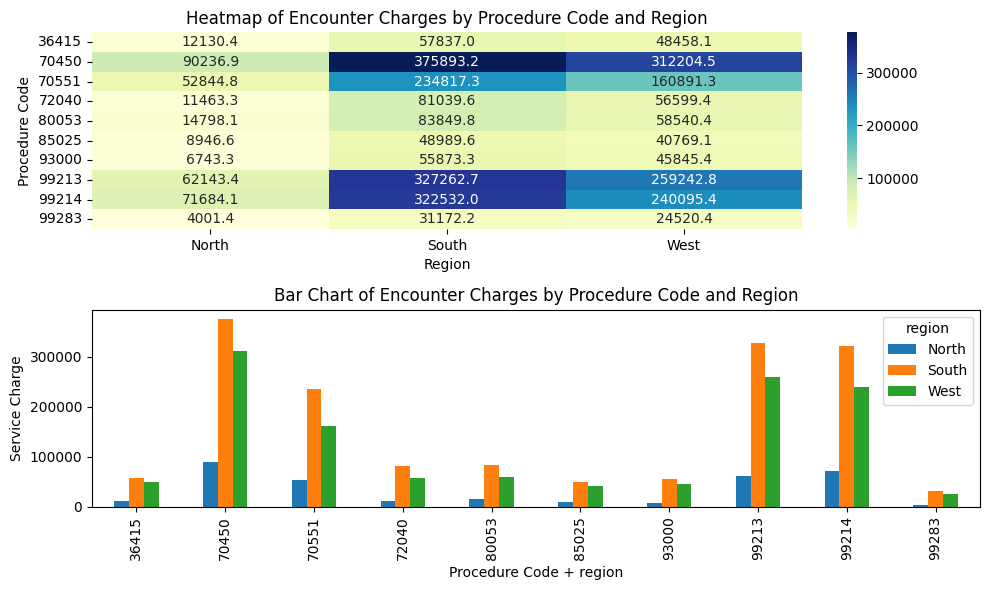

In [10]:
# TODO: Create heatmap from pivot table
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
sns.heatmap(pivot_table ,fmt=".1f", cmap="YlGnBu", ax=axes[0], annot=True)
axes[0].set_title('Heatmap of Encounter Charges by Procedure Code and Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Procedure Code')
plt.tight_layout()
# TODO: Create bar chart from pivot table
pivot_table.plot(kind='bar', legend=True, ax=axes[1])
axes[1].set_title('Bar Chart of Encounter Charges by Procedure Code and Region')
axes[1].set_xlabel('Procedure Code + region')
axes[1].set_ylabel('Service Charge')
plt.tight_layout()

# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.savefig('output/q3_pivot_visualization.png')

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques